<h1> Movie Recommendation System </h1>
<br>
<br>
<a href= "https://github.com/saksh2410/movieRecommendationSystem"><p> Github: https://github.com/saksh2410/movieRecommendationSystem </p> </a>

In [ ]:
# imports
import matplotlib.pyplot as plt
# custom module to read data from csv files
from load_data import load_credits, load_movies
# custom module to preprocess data and generate tags
import preprocess
# custom module to build recommender system based on cosine similarity
import recommender

In [19]:
# load data
movies = load_movies()
credits = load_credits()

In [20]:
# preprocess data

# merge movies and credits dataframes
df_movies = preprocess.merge_movies_credits(movies, credits)
# clean the merged dataframe by removing null values and duplicates, selecting relevant columns and formatting text
df_movies = preprocess.clean_dataframe(df_movies)

# preview cleaned data
df_movies.head()

,title,genres,keywords,overview,tagline,cast,director
0,Avatar,Action Adventure Fantasy ScienceFiction,cultureclash future spacewar spacecolony socie...,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,SamWorthington ZoeSaldana SigourneyWeaver Step...,JamesCameron
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drugabuse exoticisland eastindiatradingc...,"Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.",JohnnyDepp OrlandoBloom KeiraKnightley Stellan...,GoreVerbinski
2,Spectre,Action Adventure Crime,spy basedonnovel secretagent sequel mi6 britis...,A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,DanielCraig ChristophWaltz LéaSeydoux RalphFie...,SamMendes
3,The Dark Knight Rises,Action Crime Drama Thriller,dccomics crimefighter terrorist secretidentity...,Following the death of District Attorney Harve...,The Legend Ends,ChristianBale MichaelCaine GaryOldman AnneHath...,ChristopherNolan
4,John Carter,Action Adventure ScienceFiction,basedonnovel mars medallion spacetravel prince...,"John Carter is a war-weary, former military ca...","Lost in our world, found in another.",TaylorKitsch LynnCollins SamanthaMorton Willem...,AndrewStanton


In [21]:
# generate tags for each movie
df_movies_tagged = preprocess.generate_tags(df_movies)

# stemming
df_movies_tagged = preprocess.stem_tags(df_movies_tagged)

# preview tagged data
df_movies_tagged.head()

,title,tags
0,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,Spectre,a cryptic messag from bond’ past send him on a...
3,The Dark Knight Rises,follow the death of district attorney harvey d...
4,John Carter,"john carter is a war-weary, former militari ca..."


In [22]:
# create count matrix
vectors = recommender.create_count_matrix(df_movies_tagged["tags"])
# compute tf-idf matrix
tfidf_matrix = recommender.compute_tfidf(vectors)
# compute cosine similarity matrix
cosine_sim = recommender.calculate_cosine_similarity(tfidf_matrix)

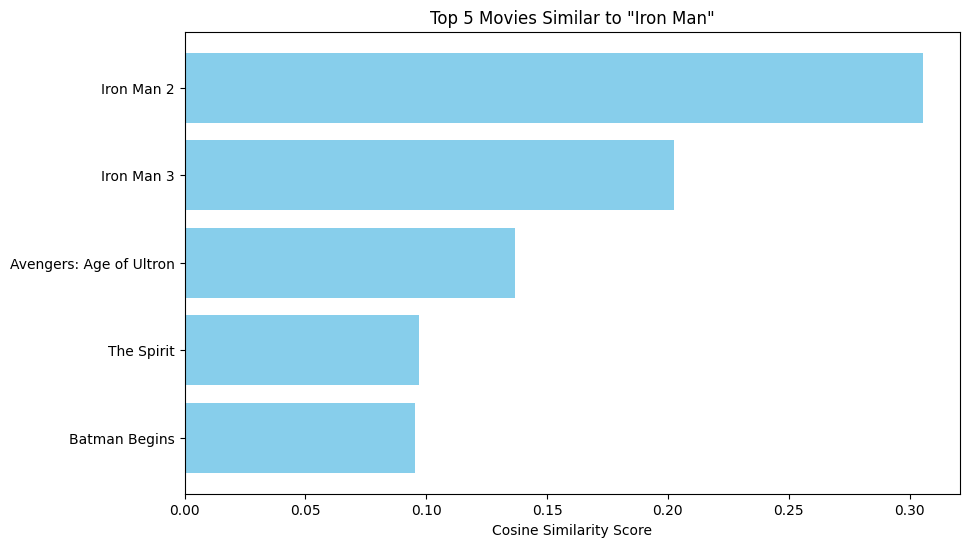

In [37]:
# plot the top 5 similar movies based on cosine similarity.
def plot_top_similar_movies(movie_title, df_movies, cosine_sim, top_n=5):

    # Fetching recommendations
    recommended_movies = recommender.get_recommendations(similarity_matrix=cosine_sim, titles=df_movies, target_title=movie_title, top_n=top_n)

    # plotting data
    plt.figure(figsize=(10, 6))
    plt.barh([i[0] for i in recommended_movies], [i[1] for i in recommended_movies], color='skyblue')
    plt.xlabel('Cosine Similarity Score')
    plt.title(f'Top {top_n} Movies Similar to "{movie_title}"')
    plt.gca().invert_yaxis()
    plt.show()

# Example usage
sample_movie = "Iron Man"
plot_top_similar_movies(sample_movie, df_movies_tagged["title"].to_list(), cosine_sim)
